In [1]:
import pygame,random,gymnasium as gym,numpy as np,matplotlib.pyplot as plt
#import tensorflow as tf,os,warnings
#from tensorflow.keras import optimizers, losses
#from tensorflow.keras import Model
from collections import deque
#from tensorflow.python.framework import random_seed
from IPython.display import clear_output
#warnings.filterwarnings("ignore", message="Model's `__init__()` arguments contain non-serializable objects.")
import torch ,os
seed = 1
s =int(seed)
np.random.seed(s)
np.random.default_rng(s)
os.environ['PYTHONHASHSEED'] = str(s)
random.seed(seed)

torch.manual_seed(s)
torch.cuda.manual_seed_all(s)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

pygame 2.1.3 (SDL 2.0.22, Python 3.11.13)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [2]:
class Network(nn.Module):
    def __init__(self, state_size: int, action_size: int):
        """
        PyTorch version of your network.
        :param state_size: input dimension (not used explicitly in linear layers here,
                           but kept for API compatibility)
        :param action_size: number of actions (output dimension)
        :param cfg: object with attribute hidden_size
        """

        super().__init__()
        hidden1 = 128
        hidden2 = 64
        hidden3 = 32
        self.num_action = action_size
        self.layer1 = nn.Linear(state_size, hidden1)
        self.layer2 = nn.Linear(hidden1, hidden2)
        self.layer3 = nn.Linear(hidden2, hidden3)
        self.value_head = nn.Linear(hidden3,1)
        self.advantage_head = nn.Linear(hidden3,self.num_action)
        self.activation = nn.ReLU()

    def forward(self, state):
        """
        Forward pass.
        x: tensor of shape (batch, state_size) or (state_size,) for single sample
        returns: Q-values tensor of shape (batch, num_action)
        """
        if state.dim() == 1:
            state = state.unsqueeze(0)
        
        h = self.activation(self.layer1(state))
        h = self.activation(self.layer2(h))
        h = self.activation(self.layer3(h))

        value = self.value_head(h)                  
        advantages = self.advantage_head(h)      
        
        mean_advantages = advantages.mean(dim=1, keepdim=True)  
        centered_advantages = advantages - mean_advantages  

        q_values = value + centered_advantages 

        return q_values



episode: 1/1000, score: -394.2, e: 1.0
episode: 2/1000, score: -157.3, e: 0.9679
episode: 3/1000, score: -472.9, e: 0.8927
episode: 4/1000, score: -195.4, e: 0.8846
episode: 5/1000, score: -202.1, e: 0.9411
episode: 6/1000, score: -141.2, e: 1.011
episode: 7/1000, score: -204.0, e: 1.036
episode: 8/1000, score: -211.0, e: 0.9892
episode: 9/1000, score: -383.2, e: 0.9016
episode: 10/1000, score: -22.27, e: 0.8324
episode: 11/1000, score: -294.2, e: 0.8261
episode: 12/1000, score: -285.5, e: 0.8796
episode: 13/1000, score: -371.4, e: 0.9449
episode: 14/1000, score: -209.3, e: 0.9662
episode: 15/1000, score: -390.7, e: 0.9219
episode: 16/1000, score: -383.1, e: 0.84
episode: 17/1000, score: -457.7, e: 0.7762
episode: 18/1000, score: -414.7, e: 0.7716
episode: 19/1000, score: -323.3, e: 0.8222
episode: 20/1000, score: -182.7, e: 0.8827
episode: 21/1000, score: -105.3, e: 0.9015
episode: 22/1000, score: -352.9, e: 0.8591
episode: 23/1000, score: -75.46, e: 0.7826
episode: 24/1000, score: -4

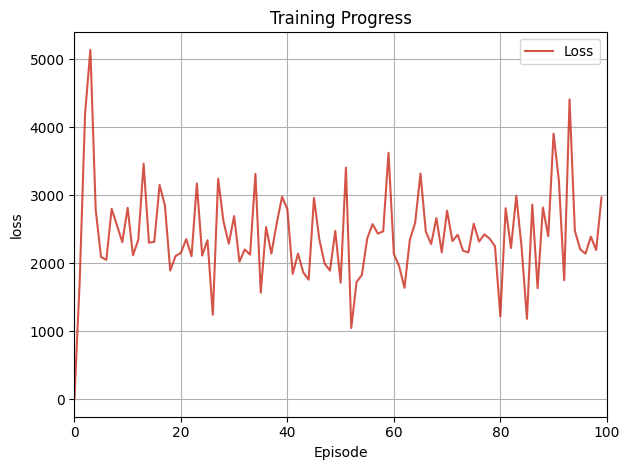

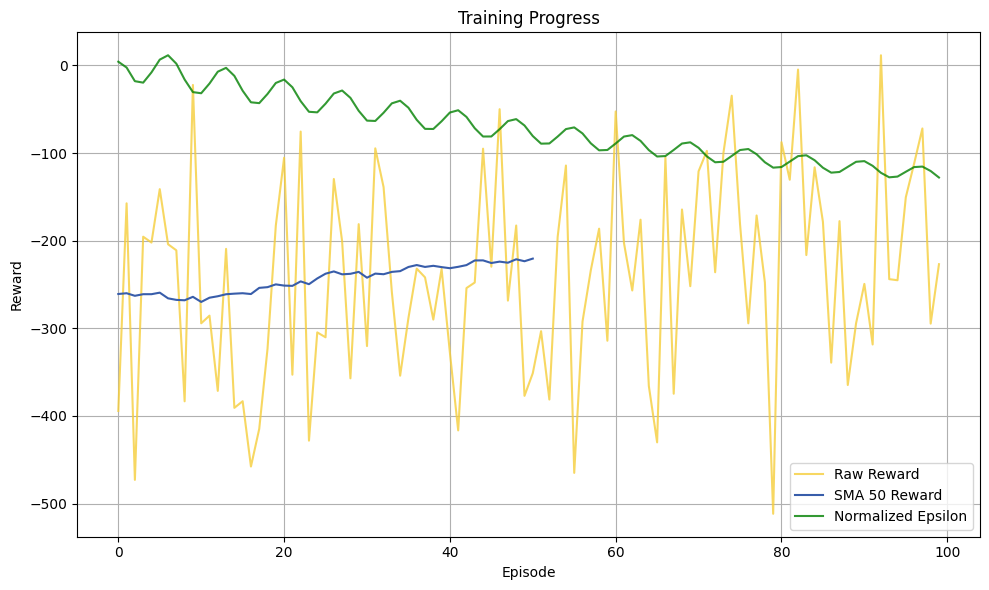

episode: 101/1000, score: -43.58, e: 0.3386
episode: 102/1000, score: -108.5, e: 0.3429
episode: 103/1000, score: -52.32, e: 0.3678
episode: 104/1000, score: -32.74, e: 0.3916
episode: 105/1000, score: -194.1, e: 0.3938
episode: 106/1000, score: -193.5, e: 0.3705
episode: 107/1000, score: -22.75, e: 0.3371
episode: 108/1000, score: -331.4, e: 0.3162
episode: 109/1000, score: -65.02, e: 0.3207
episode: 110/1000, score: -353.1, e: 0.3442
episode: 111/1000, score: -223.8, e: 0.3662
episode: 112/1000, score: -237.6, e: 0.3677
episode: 113/1000, score: -203.9, e: 0.3456
episode: 114/1000, score: -153.6, e: 0.3145
episode: 115/1000, score: -183.2, e: 0.2954
episode: 116/1000, score: -8.845, e: 0.3001
episode: 117/1000, score: -149.1, e: 0.3221
episode: 118/1000, score: -190.5, e: 0.3424
episode: 119/1000, score: -39.07, e: 0.3434
episode: 120/1000, score: -211.7, e: 0.3225
episode: 121/1000, score: -0.06696, e: 0.2935
episode: 122/1000, score: -207.9, e: 0.2761
episode: 123/1000, score: -90.

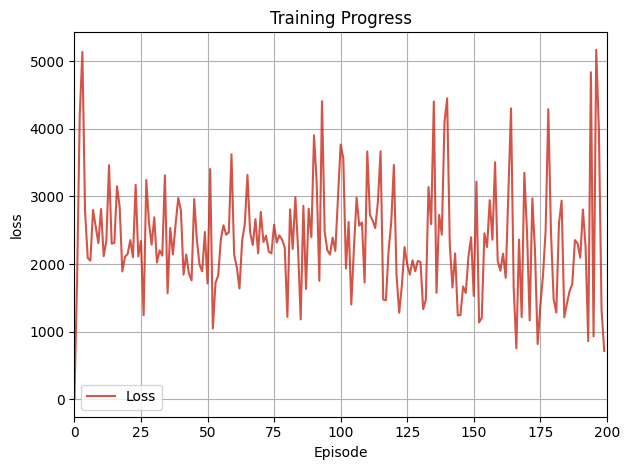

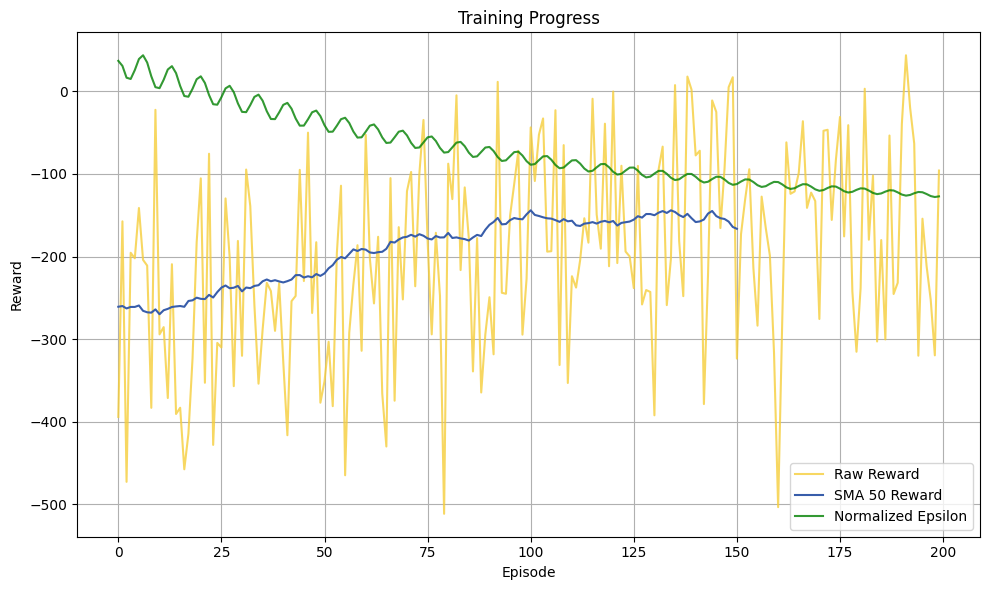

episode: 201/1000, score: -48.8, e: 0.1474
episode: 202/1000, score: -238.8, e: 0.1548
episode: 203/1000, score: 133.1, e: 0.1529
episode: 204/1000, score: -269.7, e: 0.1424
episode: 205/1000, score: -21.16, e: 0.1303
episode: 206/1000, score: -140.4, e: 0.1247
episode: 207/1000, score: -149.6, e: 0.1288
episode: 208/1000, score: -7.358, e: 0.1383
episode: 209/1000, score: 28.71, e: 0.1451
episode: 210/1000, score: -92.31, e: 0.1432
episode: 211/1000, score: -152.6, e: 0.1332
episode: 212/1000, score: -266.0, e: 0.122
episode: 213/1000, score: -195.2, e: 0.117
episode: 214/1000, score: -120.8, e: 0.1209
episode: 215/1000, score: -26.18, e: 0.1298
episode: 216/1000, score: -84.92, e: 0.136
episode: 217/1000, score: -250.8, e: 0.1341
episode: 218/1000, score: -112.1, e: 0.1247
episode: 219/1000, score: -198.4, e: 0.1143
episode: 220/1000, score: -116.0, e: 0.1098
episode: 221/1000, score: -10.62, e: 0.1136
episode: 222/1000, score: -80.36, e: 0.1219
episode: 223/1000, score: -224.5, e: 0

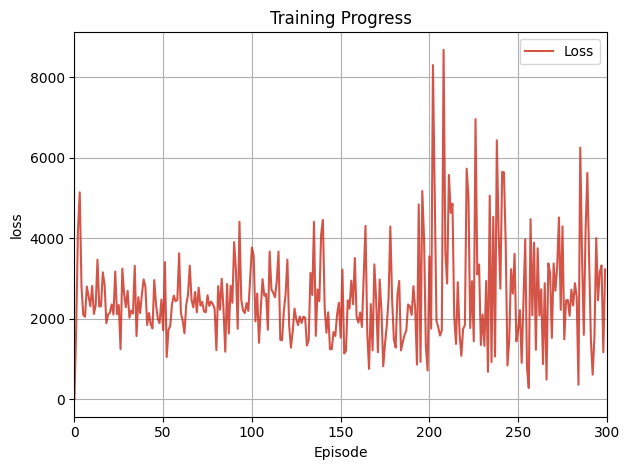

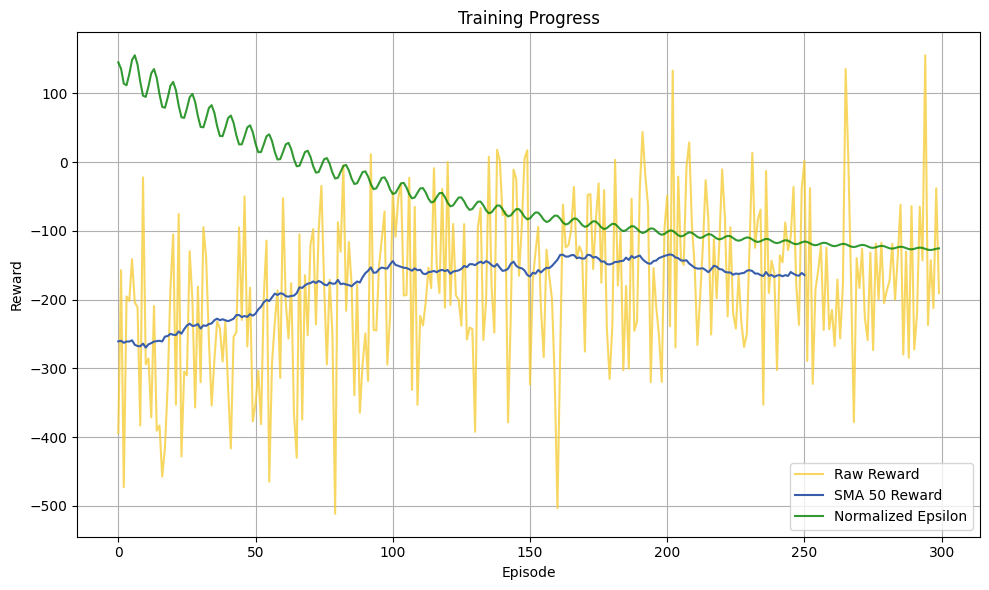

episode: 301/1000, score: -124.5, e: 0.06298
episode: 302/1000, score: -139.0, e: 0.05854
episode: 303/1000, score: 14.19, e: 0.05438
episode: 304/1000, score: -193.6, e: 0.05324
episode: 305/1000, score: -119.8, e: 0.05556
episode: 306/1000, score: -135.6, e: 0.05918
episode: 307/1000, score: -99.8, e: 0.061
episode: 308/1000, score: -80.84, e: 0.05935
episode: 309/1000, score: -176.4, e: 0.05519
episode: 310/1000, score: 11.71, e: 0.05133
episode: 311/1000, score: -142.0, e: 0.05034
episode: 312/1000, score: -126.5, e: 0.05255
episode: 313/1000, score: -110.3, e: 0.05592
episode: 314/1000, score: -130.9, e: 0.05756
episode: 315/1000, score: -110.5, e: 0.05597
episode: 316/1000, score: -180.8, e: 0.05206
episode: 317/1000, score: -230.8, e: 0.0485
episode: 318/1000, score: -101.2, e: 0.04763
episode: 319/1000, score: -108.1, e: 0.04974
episode: 320/1000, score: -108.1, e: 0.05287
episode: 321/1000, score: 232.0, e: 0.05436
episode: 322/1000, score: -251.3, e: 0.05281
episode: 323/1000

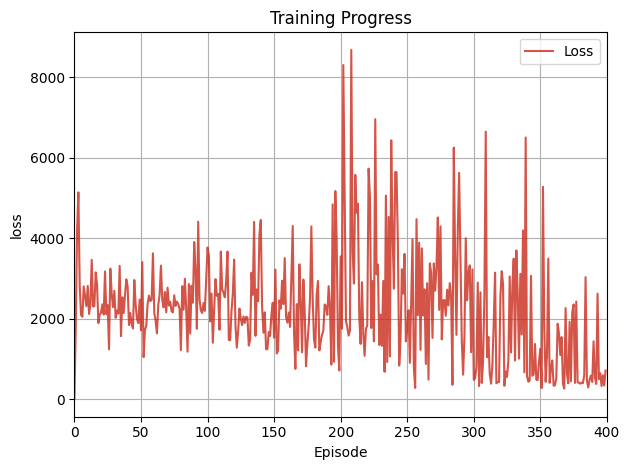

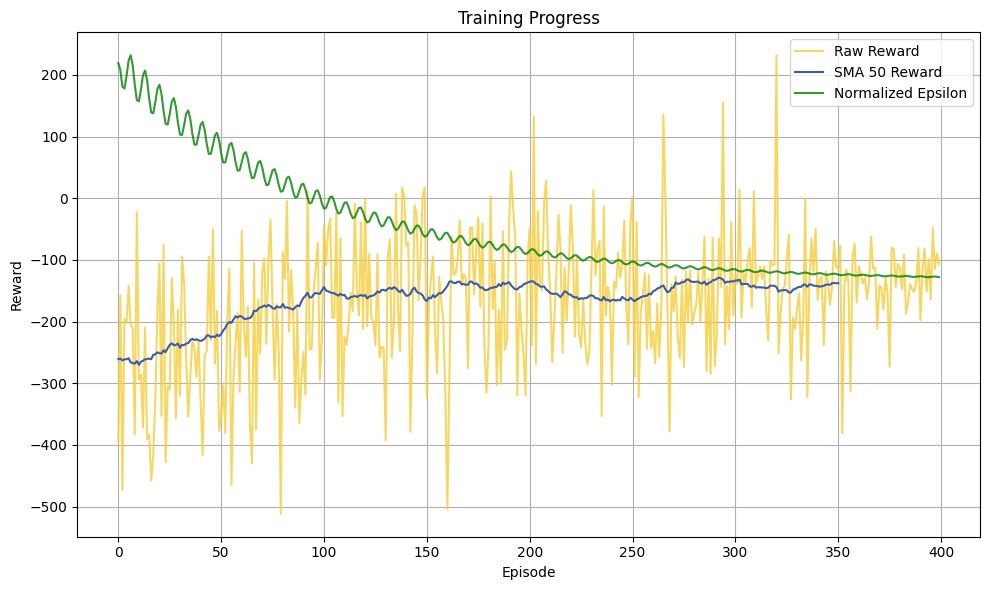

episode: 401/1000, score: -120.4, e: 0.02645
episode: 402/1000, score: -248.5, e: 0.02639
episode: 403/1000, score: -89.78, e: 0.0275
episode: 404/1000, score: -124.0, e: 0.02879
episode: 405/1000, score: -136.9, e: 0.02916
episode: 406/1000, score: -84.32, e: 0.02822
episode: 407/1000, score: -187.3, e: 0.02656
episode: 408/1000, score: -120.3, e: 0.02533
episode: 409/1000, score: -138.5, e: 0.0253
episode: 410/1000, score: -161.7, e: 0.02635
episode: 411/1000, score: -119.6, e: 0.02754
episode: 412/1000, score: -192.7, e: 0.02786
episode: 413/1000, score: -15.9, e: 0.02696
episode: 414/1000, score: -73.05, e: 0.02542
episode: 415/1000, score: -81.58, e: 0.02428
episode: 416/1000, score: -42.77, e: 0.02428
episode: 417/1000, score: -128.5, e: 0.02527
episode: 418/1000, score: -114.3, e: 0.02637
episode: 419/1000, score: -98.18, e: 0.02665
episode: 420/1000, score: -102.4, e: 0.02579
episode: 421/1000, score: -73.6, e: 0.02435
episode: 422/1000, score: -153.8, e: 0.02331
episode: 423/1

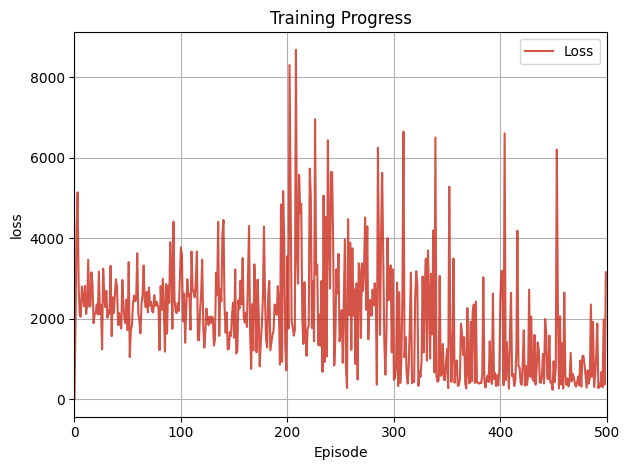

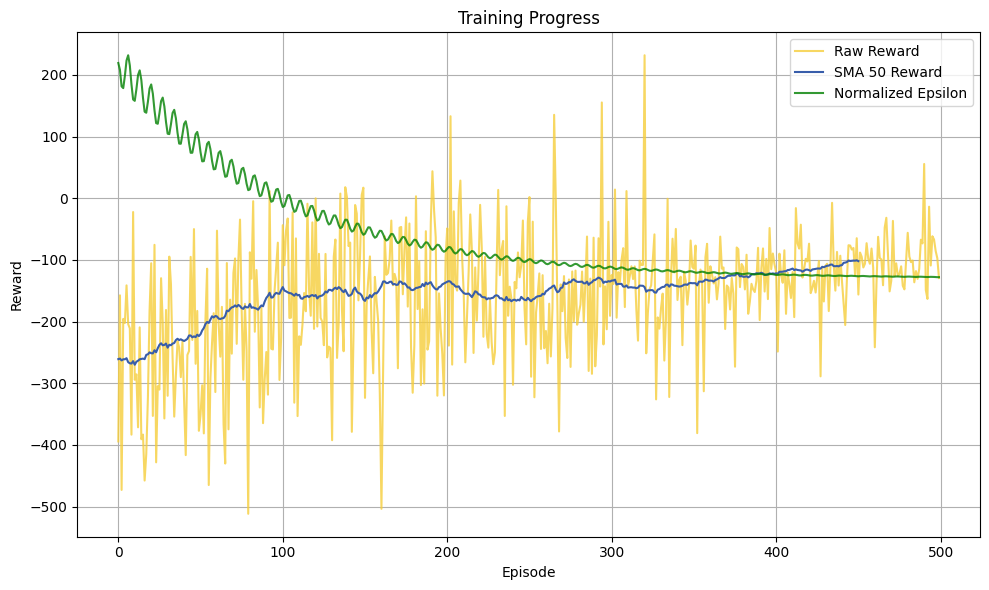

episode: 501/1000, score: -125.0, e: 0.01672
episode: 502/1000, score: -96.4, e: 0.01715
episode: 503/1000, score: -212.4, e: 0.01716
episode: 504/1000, score: -86.65, e: 0.0167
episode: 505/1000, score: -40.61, e: 0.01608
episode: 506/1000, score: -142.1, e: 0.01572
episode: 507/1000, score: -103.7, e: 0.01583
episode: 508/1000, score: -289.0, e: 0.01628
episode: 509/1000, score: -66.01, e: 0.01668
episode: 510/1000, score: -117.3, e: 0.01667
episode: 511/1000, score: -56.93, e: 0.01624
episode: 512/1000, score: -94.37, e: 0.01566
episode: 513/1000, score: -138.8, e: 0.01533
episode: 514/1000, score: -70.71, e: 0.01544
episode: 515/1000, score: -40.68, e: 0.01587
episode: 516/1000, score: -48.59, e: 0.01623
episode: 517/1000, score: -139.2, e: 0.01622
episode: 518/1000, score: -140.5, e: 0.01581
episode: 519/1000, score: -166.6, e: 0.01527
episode: 520/1000, score: -185.2, e: 0.01497
episode: 521/1000, score: -106.3, e: 0.01508
episode: 522/1000, score: -115.9, e: 0.01548
episode: 523

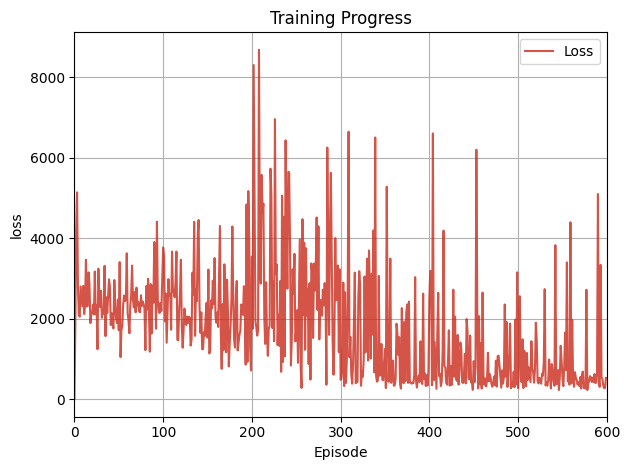

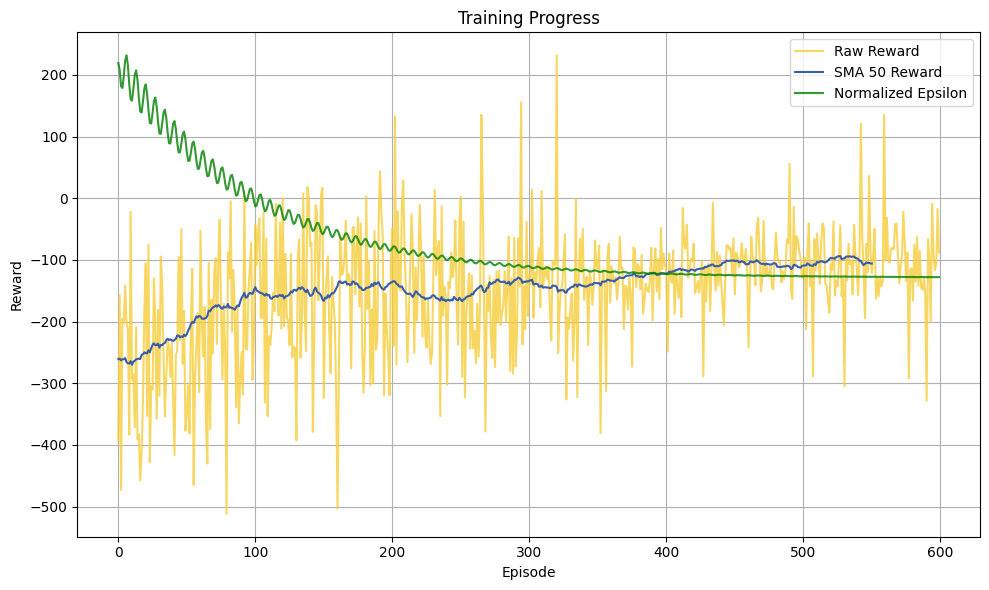

episode: 601/1000, score: -154.0, e: 0.01266
episode: 602/1000, score: -47.99, e: 0.01246
episode: 603/1000, score: -54.38, e: 0.01224
episode: 604/1000, score: -96.07, e: 0.01214
episode: 605/1000, score: -58.09, e: 0.01223
episode: 606/1000, score: -71.74, e: 0.01241
episode: 607/1000, score: -111.1, e: 0.01253
episode: 608/1000, score: -133.7, e: 0.01248
episode: 609/1000, score: -105.9, e: 0.01229
episode: 610/1000, score: -94.83, e: 0.01208
episode: 611/1000, score: -84.35, e: 0.012
episode: 612/1000, score: -96.96, e: 0.01208
episode: 613/1000, score: -142.2, e: 0.01225
episode: 614/1000, score: -46.03, e: 0.01236
episode: 615/1000, score: -115.5, e: 0.01231
episode: 616/1000, score: -96.64, e: 0.01213
episode: 617/1000, score: -67.85, e: 0.01194
episode: 618/1000, score: -62.78, e: 0.01187
episode: 619/1000, score: -24.92, e: 0.01195
episode: 620/1000, score: -171.4, e: 0.0121
episode: 621/1000, score: -109.0, e: 0.0122
episode: 622/1000, score: -81.46, e: 0.01215
episode: 623/1

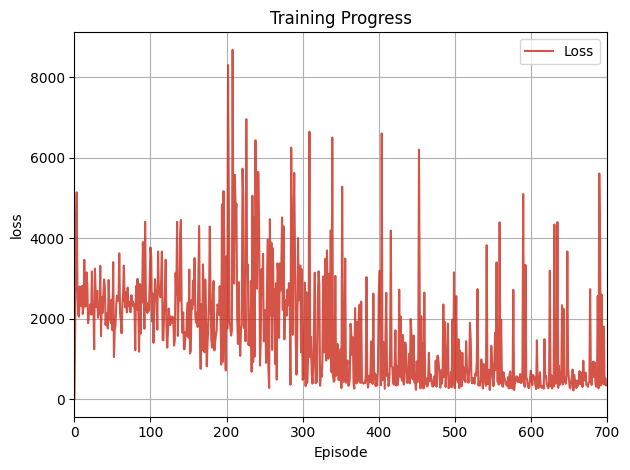

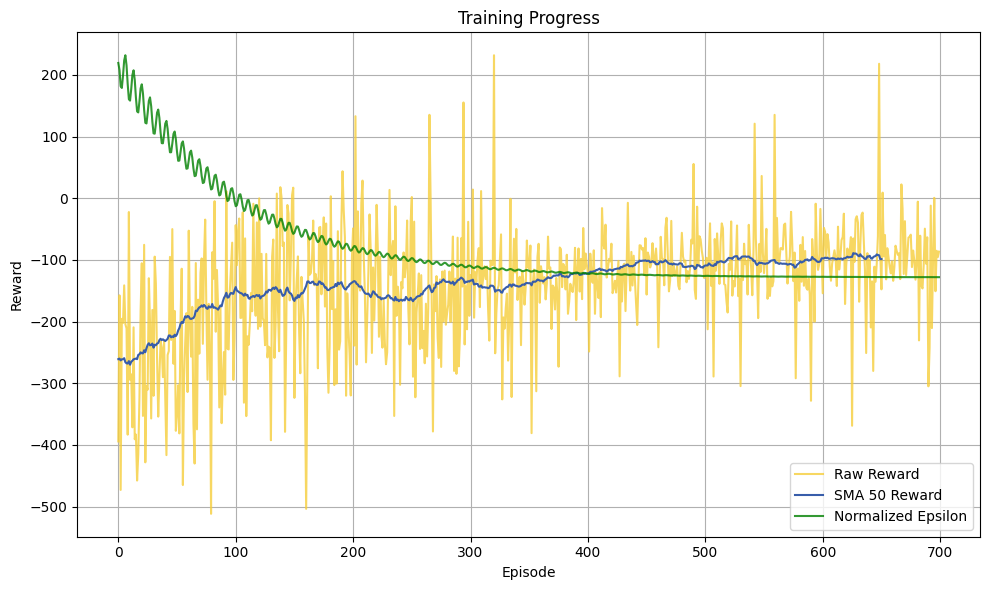

episode: 701/1000, score: -77.4, e: 0.01083
episode: 702/1000, score: -39.0, e: 0.01081
episode: 703/1000, score: -132.3, e: 0.01086
episode: 704/1000, score: -90.21, e: 0.01092
episode: 705/1000, score: -70.09, e: 0.01095
episode: 706/1000, score: -73.11, e: 0.01092
episode: 707/1000, score: -182.5, e: 0.01084
episode: 708/1000, score: -235.9, e: 0.01077
episode: 709/1000, score: -160.4, e: 0.01076
episode: 710/1000, score: -318.8, e: 0.0108
episode: 711/1000, score: -73.67, e: 0.01086
episode: 712/1000, score: -73.45, e: 0.01089
episode: 713/1000, score: -222.8, e: 0.01086
episode: 714/1000, score: -120.7, e: 0.01078
episode: 715/1000, score: -147.0, e: 0.01072
episode: 716/1000, score: -104.4, e: 0.0107
episode: 717/1000, score: -129.1, e: 0.01075
episode: 718/1000, score: -127.2, e: 0.0108
episode: 719/1000, score: -89.9, e: 0.01083
episode: 720/1000, score: -56.09, e: 0.0108
episode: 721/1000, score: -65.37, e: 0.01073
episode: 722/1000, score: -42.73, e: 0.01067
episode: 723/1000

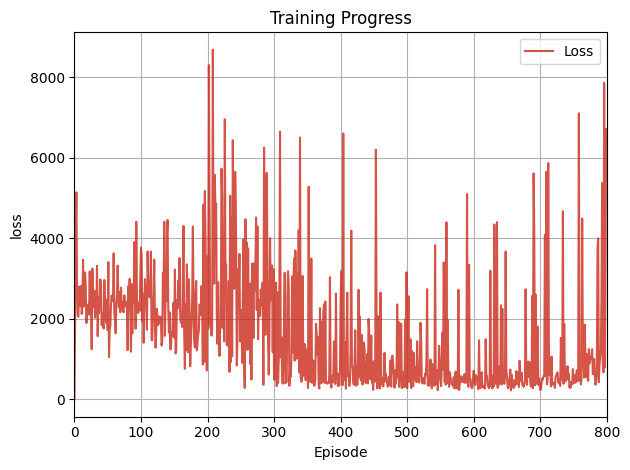

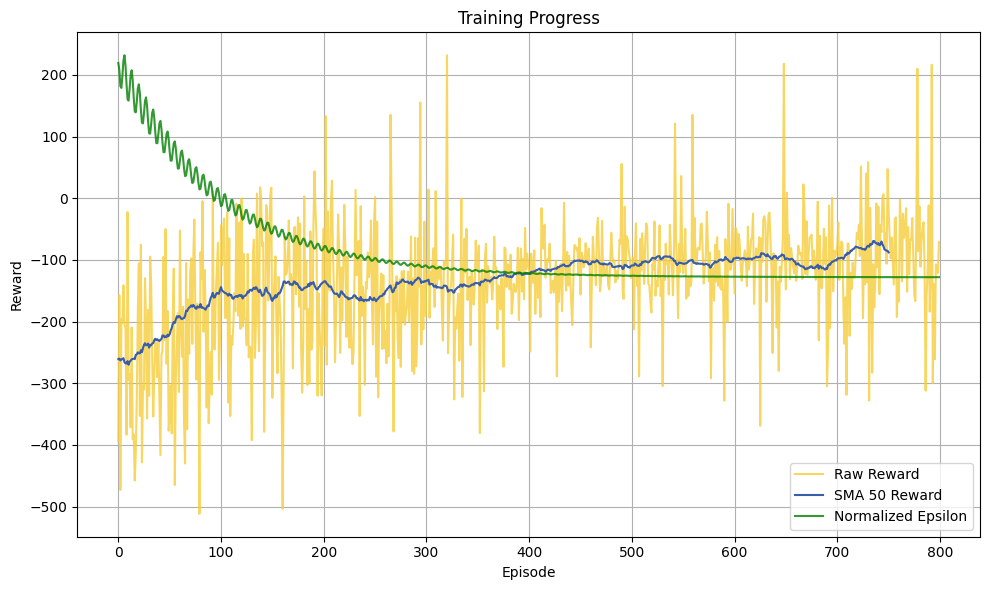

episode: 801/1000, score: 11.93, e: 0.01033
episode: 802/1000, score: -40.94, e: 0.01035
episode: 803/1000, score: -66.25, e: 0.01036
episode: 804/1000, score: -157.4, e: 0.01034
episode: 805/1000, score: -178.9, e: 0.01031
episode: 806/1000, score: -32.72, e: 0.01029
episode: 807/1000, score: -66.99, e: 0.01029
episode: 808/1000, score: -47.16, e: 0.01031
episode: 809/1000, score: -136.3, e: 0.01033
episode: 810/1000, score: -116.7, e: 0.01033
episode: 811/1000, score: -8.806, e: 0.01032
episode: 812/1000, score: -47.32, e: 0.01029
episode: 813/1000, score: 68.33, e: 0.01027
episode: 814/1000, score: -93.14, e: 0.01027
episode: 815/1000, score: 0.5673, e: 0.01029
episode: 816/1000, score: -79.38, e: 0.01031
episode: 817/1000, score: -44.66, e: 0.01031
episode: 818/1000, score: -65.64, e: 0.01029
episode: 819/1000, score: 25.74, e: 0.01027
episode: 820/1000, score: 1.285, e: 0.01025
episode: 821/1000, score: -227.5, e: 0.01025
episode: 822/1000, score: -49.0, e: 0.01027
episode: 823/10

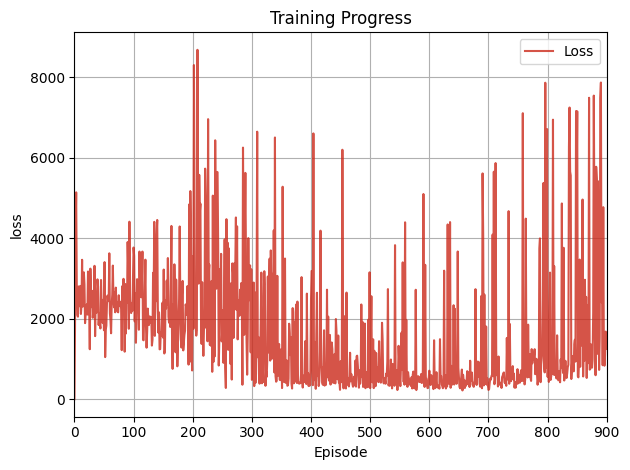

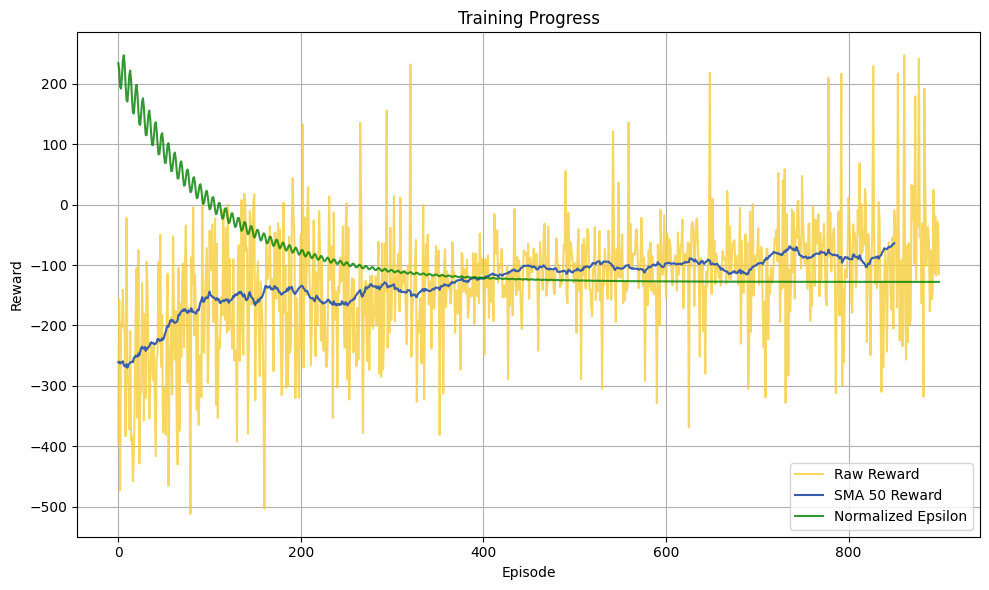

episode: 901/1000, score: -111.9, e: 0.01013
episode: 902/1000, score: -131.7, e: 0.01012
episode: 903/1000, score: -142.8, e: 0.01011
episode: 904/1000, score: -134.4, e: 0.01011
episode: 905/1000, score: -127.7, e: 0.01011
episode: 906/1000, score: -42.32, e: 0.01012
episode: 907/1000, score: -23.06, e: 0.01013
episode: 908/1000, score: 261.5, e: 0.01012
episode: 909/1000, score: 192.4, e: 0.01012
episode: 910/1000, score: -124.6, e: 0.01011
episode: 911/1000, score: -212.4, e: 0.0101
episode: 912/1000, score: -144.1, e: 0.0101
episode: 913/1000, score: 110.2, e: 0.01011
episode: 914/1000, score: 242.8, e: 0.01012
episode: 915/1000, score: 176.8, e: 0.01012
episode: 916/1000, score: 149.3, e: 0.01011
episode: 917/1000, score: 237.5, e: 0.0101
episode: 918/1000, score: 224.5, e: 0.01009
episode: 919/1000, score: -56.3, e: 0.0101
episode: 920/1000, score: -190.5, e: 0.0101
episode: 921/1000, score: -82.54, e: 0.01011
episode: 922/1000, score: -72.58, e: 0.01011
episode: 923/1000, score

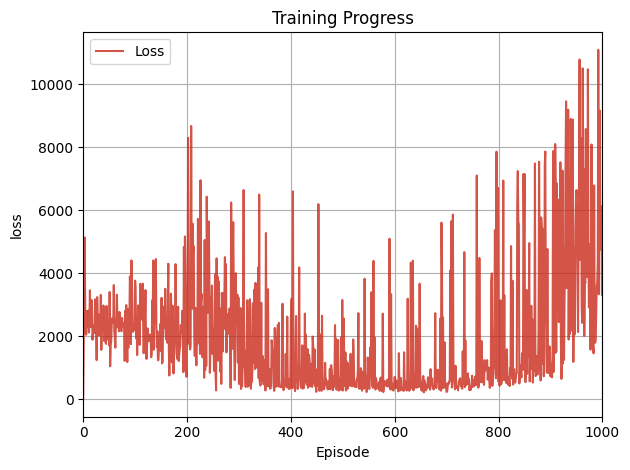

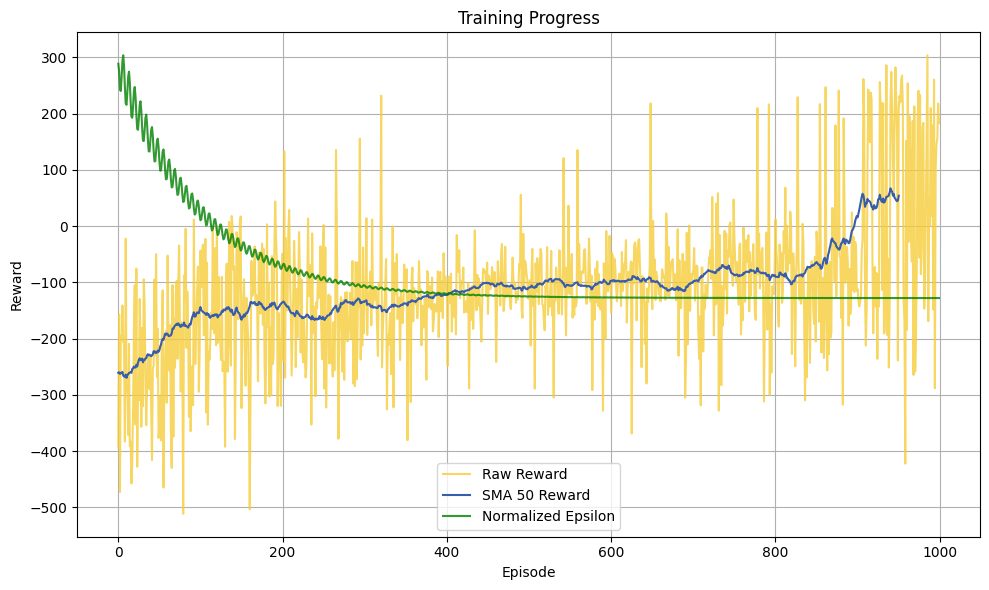

In [ ]:

class DQNAgent:
    def __init__(
        self, 
        env: gym.Env,
        batch_size: int,
        target_update: int,
    ):        
        # CREATING THE Q-Network
        self.env = env
        self.action_space = env.action_space
        self.action_space.seed(seed)
        self.state_size = self.env.observation_space.shape[0]
        self.action_size = self.env.action_space.n
        
        self.batch_size = batch_size
        # hyper parameters
        memory_size = 100000
        self.lr = 0.001
        self.target_update = target_update
        self.gamma = 0.99
        
        self.dqn = Network(self.state_size, self.action_size)
        self.dqn_target = Network(self.state_size, self.action_size)
        self.train_start = 1000
        self.optimizer = optim.Adam(self.dqn.parameters(),lr=self.lr)        
        self.memory = deque(maxlen=memory_size)
        self.TAU = 0.005 # target network soft update hyperparameter
    
    def _process_state(self, state):
        if isinstance(state, dict):
            print("isinstance(state, dict")
            return np.concatenate([state[key].flatten() for key in sorted(state.keys())])    
        else:
            return np.asarray(state).flatten()
    # EXPLORATION VS EXPLOITATION

    def get_action(self, state, epsilon):
        state = self._process_state(state)
        state = torch.from_numpy(np.array(state)).float().unsqueeze(0)
        with torch.no_grad():
            q_value = self.dqn(state)[0]
        if np.random.rand() <= epsilon:
            action = np.random.choice(self.action_size)
        else:
            action = np.argmax(q_value).item() 
        return action
    
    def append_sample(self, state, action, reward, next_state, done):
        state = self._process_state(state)
        next_state = self._process_state(next_state)
        self.memory.append((state, action, reward, next_state, done))
    # UPDATING THE Q-VALUE
    def train_step(self):
        mini_batch = random.sample(self.memory, self.batch_size)

        states      = np.array([i[0] for i in mini_batch])
        actions     = np.array([i[1] for i in mini_batch])
        rewards     = np.array([i[2] for i in mini_batch])
        next_states = np.array([i[3] for i in mini_batch])
        dones       = np.array([i[4] for i in mini_batch])

        
        states      = torch.from_numpy(states).float()
        actions     = torch.from_numpy(actions).long()
        rewards     = torch.from_numpy(rewards).float()
        next_states = torch.from_numpy(next_states).float()
        dones       = torch.from_numpy(dones).float()
        
        next_Qs = self.dqn(next_states)
        next_action = torch.argmax(next_Qs, dim=1)
        next_Q_targs = self.dqn_target(next_states)
        target_value = next_Q_targs.gather(1, next_action.unsqueeze(1)).squeeze(1)

        mask = 1 - dones
        target_value = rewards + self.gamma * target_value * mask 
        
        curr_Qs = self.dqn(states)
        
        main_value = curr_Qs.gather(1, actions.unsqueeze(1)).squeeze(1)
        error = ((main_value - target_value) **2/ 2.0)
        loss = torch.mean(error)
            
        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()
        return loss.item()
    # after some time interval update the target model to be same with model
    def _target_update(self):
        tau = self.TAU
        with torch.no_grad():
            for param, target_param in zip(self.dqn.parameters(), self.dqn_target.parameters()):
                target_param.data.copy_(target_param.data * (1.0 - tau) + param.data * tau)
    
    def update_Gamma(self):
        self.gamma = 1 - 0.985 * (1 - self.gamma)
    def load(self, path):
        
        self.dqn = Network(self.state_size[0], self.action_size, self.cfg).to(self.device)
        self.dqn.load_state_dict(torch.load(path,map_location=self.device))
        self.dqn_target.load_state_dict(torch.load(path,map_location=self.device))
    def save(self, path):
        os.makedirs(os.path.dirname(path), exist_ok=True)
        torch.save(self.dqn.state_dict(), path)

Train=True

env = gym.make("LunarLander-v3",render_mode="human" if not Train else None,continuous=False, gravity=-9.8,
               enable_wind=True, wind_power=15.0, turbulence_power=1.5)
# parameters
target_update = 20
# INITIALIZING THE Q-PARAMETERS
hidden_size = 86
max_episodes = 1000  # Set total number of episodes to train agent on.
batch_size =128#128
# Exploration parameters
epsilon = 1.0                 # Exploration rate
max_epsilon = 1.0             # Exploration probability at start
min_epsilon = 0.01            # Minimum exploration probability 
decay_rate = 0.012            # Exponential decay rate for exploration prob
myai=False
agent = DQNAgent(
    env, 
#     memory_size, 
    batch_size, 
    target_update, 
#     epsilon_decay,
)
save_path='./weights-and-plot/final_weights'
load_path='./weights-and-plot/final_weights' + '_' + '300'
def plot_training(episode,loss_history):
        agent.save(save_path + '_' + f'{episode}')
        print('\n~~~~~~Interval Save: Model saved.\n')
        sma_reward = np.convolve(reward_history, np.ones(50)/50, mode='valid')
        max_reward=np.max(reward_history)
        min_reward=np.min(reward_history)
        #normalized_loss = np.interp(loss_history, (np.min(loss_history), np.max(loss_history)), (min_reward/2,max_reward))
        normalized_epsilon = np.interp(epsilon_history, (np.min(epsilon_history), np.max(epsilon_history)), (min_reward/4,max_reward))
        plt.plot(loss_history, label='Loss', color='#CB291A', alpha=0.8)
        
        plt.title("Training Progress")
        plt.xlabel("Episode")
        plt.ylabel("loss")

        plt.xlim(0, len(loss_history))
        
        plt.legend()
        plt.grid(True)

        if episode == max_episodes:
            plt.savefig('./weights-and-plot/loss-of-training_progress.png', format='png', dpi=600, bbox_inches='tight')
            
        plt.tight_layout()
        plt.show()
        plt.clf()
        plt.close()

        plt.figure(figsize=(10, 6))
        plt.plot(reward_history, label='Raw Reward', color='#F6CE3B', alpha=0.8)
        plt.plot(sma_reward, label='SMA 50 Reward', color='#385DAA')
        plt.plot(normalized_epsilon, label='Normalized Epsilon', color='green', alpha=0.8)
        
        plt.title("Training Progress")
        plt.xlabel("Episode")
        plt.ylabel("Reward")
        plt.legend()
        plt.grid(True)

        if episode == max_episodes:
            plt.savefig('./weights-and-plot/training_progress.png', format='png', dpi=600, bbox_inches='tight')
            
        plt.tight_layout()
        plt.show()
        plt.clf()
        plt.close()
if __name__ == "__main__":
    
    save_intervalve=100
    if Train:
        update_cnt    = 0
        scores = []
        reward_history=[]
        epsilon_history=[]
        loss_history=[]
        for episode in range(1,max_episodes+1):
            state = agent.env.reset(seed=1+episode)
            state=state[0]
            episode_reward = 0
            episode_loss=0
            done = False 
            while not done :
                update_cnt += 1
                action = agent.get_action(state, epsilon)

                next_state, reward, terminated, truncated, _= agent.env.step(action)
                if isinstance(state, tuple): 
                        next_state = next_state[0]
                done = terminated or truncated
                agent.append_sample(state, action, reward, next_state, done)
                state = next_state
                episode_reward += reward
                
                if done:
                    scores.append(episode_reward)
                    print("episode: {}/{}, score: {:.4}, e: {:.4}".format(episode, max_episodes, episode_reward, epsilon,)) 
                    break
                # if training is ready
                if (update_cnt >= agent.batch_size):
                    # UPDATING THE Q-VALUE
                    loss=agent.train_step()
                    agent.update_Gamma()
                    episode_loss +=loss
                    if update_cnt % agent.target_update == 0:
                        agent._target_update()
            loss_history.append(episode_loss)
            reward_history.append(episode_reward)   
            epsilon_history.append(epsilon)
            if myai:
                y = np.exp(-0.01 * episode) * (1 + 0.5 * np.cos(0.1 * episode + 0.1))
            else:
                y=np.exp(-decay_rate*episode) 
            epsilon = min_epsilon + (max_epsilon - min_epsilon)*y
            
            if episode % save_intervalve==0:
                plot_training(episode,loss_history)

    else:
        agent.load(load_path)
        scores = []
        for episode in range(5):
            state = agent.env.reset(seed=1)
            state=state[0]
            episode_reward = 0
            done = False  
            while not done:
                action = agent.get_action(state,0.01)
                next_state, reward, done, _ ,_= agent.env.step(action)
                if isinstance(state, tuple): 
                        next_state = next_state[0]
                agent.append_sample(state, action, reward, next_state, done)
                state = next_state
                episode_reward += reward
                if done:
                    scores.append(episode_reward)
                    print("episode: {}/{}, score: {}, e: {:.4}".format(episode+1, max_episodes, episode_reward, 0.01)) 
                    break
        pygame.quit()
        